# Deep Learning

##  Description: 
Create a code, in the provided template in Moodle, to train two Recurrent Neural Networks (RNNs) on the public benchmark dataset named Poker Hand available at: https://archive.ics.uci.edu/ml/datasets/Poker+Hand. 

Poker Hand dataset is composed of one training set named “poker-hand-training-true.data” and one testing set named “poker-hand-testing.data”. 
You will need to download both training and testing sets into your local disk by clicking the Data Folder link (see the image below).

In Poker Hand dataset, each data sample (row) is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". You can find more information about this dataset from: 
https://www.kaggle.com/datasets/rasvob/uci-poker-hand-dataset

The dataset should be imported in the code. An example on how to import the dataset to your code can be found from the link below:
https://www.kaggle.com/code/rasvob/uci-poker-dataset-classification


## Import the training and testing set in the cell below

In [ ]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from keras.layers import CategoryEncoding
from sklearn import preprocessing
from tensorflow.keras import utils

test = pd.read_csv('poker-hand-testing.data', header=None)
train = pd.read_csv('poker-hand-training-true.data', header=None)
# normal layout
train.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Label']
test.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Label']

# group suites together and card values together
# train.columns = ['S1', 'S2', 'S3', 'S4', 'S5', 'C1', 'C2', 'C3', 'C4', 'C5', 'Label']
# test.columns = ['S1', 'S2', 'S3', 'S4', 'S5', 'C1', 'C2', 'C3', 'C4', 'C5', 'Label']

# for debugging purposes
# print('Original Data')
print(train.tail())


# ensure the card values are sorted in order
train_c = train[['C1', 'C2', 'C3', 'C4', 'C5']]
train_c.values.sort()
train[['C1', 'C2', 'C3', 'C4', 'C5']] = train_c
# ensure the card values are sorted in order
test_c = test[['C1', 'C2', 'C3', 'C4', 'C5']]
test_c.values.sort()
test[['C1', 'C2', 'C3', 'C4', 'C5']] = test_c

# for debugging purposes
# print('Modified Data')
# print(train.tail())
# print(train.shape)
# print(test.head())
# print(test.shape)

# encode training labels
encoder=CategoryEncoding(num_tokens=10, output_mode="one_hot") # one hot coding to vectorize the labels

# set x and y train/test data
x_train = train.loc[:,train.columns != 'Label'].to_numpy()
x_test = test.loc[:,test.columns != 'Label'].to_numpy()
y_train = train['Label']
y_test = test['Label']

# normalize data 
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.fit_transform(x_test)

# data should be in the format : [samples, time_steps, features] 
x_train_reshaped = x_train_normalized.reshape((len(x_train), 1, 10))
x_test_reshaped = x_test_normalized.reshape((len(x_test), 1, 10))



       S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  Label
25005   3   9   2   6   4  11   4  12   2   4      0
25006   4   1   4  10   3  13   3   4   1  10      1
25007   2   1   2  10   4   4   4   1   4  13      1
25008   2  12   4   3   1  10   1  12   4   9      1
25009   1   7   3  11   3   3   4   8   3   7      1


## Implement the vanilla RNN in the cell below

In [27]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
model = Sequential() # create a sequential model
# A Sequential model is appropriate for a plain stack of layers
# where each layer has exactly one input tensor and one output tensor
model.add(SimpleRNN(units=256, input_shape=(1,10), activation='relu'))  # add recurrent neurons to the model
model.add(Dense(units=10, activation='relu')) # add dense layer as the output layer of the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) # specify loss metrics and optimizer for the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 256)               68352     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 70,922
Trainable params: 70,922
Non-trainable params: 0
_________________________________________________________________


## Train the vanilla RNN based on the training set in the cell below

In [28]:
# training the model
model.fit(x_train_reshaped, encoder(y_train), epochs=40, batch_size=64, verbose=2)

Epoch 1/40
391/391 - 4s - loss: 0.0564 - accuracy: 0.5412 - 4s/epoch - 9ms/step
Epoch 2/40
391/391 - 2s - loss: 0.0515 - accuracy: 0.5958 - 2s/epoch - 6ms/step
Epoch 3/40
391/391 - 2s - loss: 0.0473 - accuracy: 0.6587 - 2s/epoch - 4ms/step
Epoch 4/40
391/391 - 1s - loss: 0.0437 - accuracy: 0.7035 - 1s/epoch - 4ms/step
Epoch 5/40
391/391 - 1s - loss: 0.0407 - accuracy: 0.7289 - 1s/epoch - 4ms/step
Epoch 6/40
391/391 - 1s - loss: 0.0378 - accuracy: 0.7588 - 1s/epoch - 3ms/step
Epoch 7/40
391/391 - 1s - loss: 0.0351 - accuracy: 0.7877 - 1s/epoch - 3ms/step
Epoch 8/40
391/391 - 1s - loss: 0.0326 - accuracy: 0.8162 - 1s/epoch - 4ms/step
Epoch 9/40
391/391 - 1s - loss: 0.0301 - accuracy: 0.8433 - 1s/epoch - 4ms/step
Epoch 10/40
391/391 - 2s - loss: 0.0278 - accuracy: 0.8723 - 2s/epoch - 5ms/step
Epoch 11/40
391/391 - 2s - loss: 0.0253 - accuracy: 0.8992 - 2s/epoch - 6ms/step
Epoch 12/40
391/391 - 1s - loss: 0.0234 - accuracy: 0.9136 - 1s/epoch - 4ms/step
Epoch 13/40
391/391 - 1s - loss: 0.02

## Evaluate the vanilla RNN based on the testing set in the cell below

In [29]:
from sklearn.metrics import accuracy_score
# Use the trained model to predict the testing samples
y_pred = model.predict(x_test_reshaped, batch_size=128)

# Get the index of the highest predicted output value
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred_classes)

print("Accuracy: {:.2f}%".format(accuracy * 100))

7813/7813 [==============================] - 21s 3ms/step
Accuracy: 87.51%


## Present the classification accuracy and confusion matrix of the vanilla RNN in the cell below

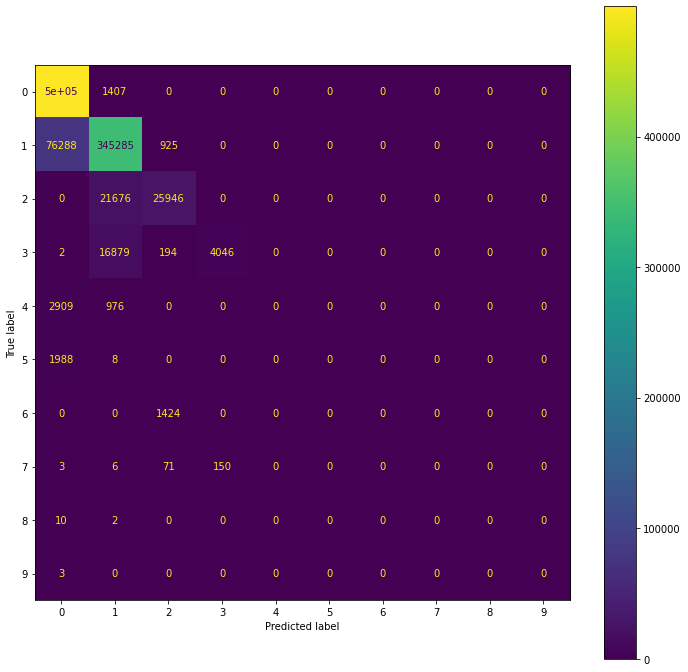

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(12, 12))
# plotting the confusion matrix for the test set
cm = confusion_matrix(y_test,y_pred_classes) 
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes, ax = ax)

## Implement the second RNN based on LSTM or GRU neurons in the cell below

In [31]:
## Replace the RNN neuron with LSTM neuron
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,CategoryEncoding
lstm_model = Sequential() # create a sequential model
lstm_model.add(LSTM(units=256, input_shape=(1,10), activation='tanh'))  # add LSTM neurons to the model
lstm_model.add(Dense(units=10, activation='tanh')) # add dense layer as the output layer of the model
lstm_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) # specify loss metrics and optimizer for the model
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               273408    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 275,978
Trainable params: 275,978
Non-trainable params: 0
_________________________________________________________________


## Train the second RNN based on the training set in the cell below

In [32]:
lstm_model.fit(x_train_reshaped, encoder(y_train), epochs=40, batch_size=64, verbose=2)

Epoch 1/40
391/391 - 7s - loss: 0.0568 - accuracy: 0.5257 - 7s/epoch - 19ms/step
Epoch 2/40
391/391 - 4s - loss: 0.0547 - accuracy: 0.5489 - 4s/epoch - 9ms/step
Epoch 3/40
391/391 - 4s - loss: 0.0543 - accuracy: 0.5554 - 4s/epoch - 10ms/step
Epoch 4/40
391/391 - 5s - loss: 0.0540 - accuracy: 0.5589 - 5s/epoch - 12ms/step
Epoch 5/40
391/391 - 4s - loss: 0.0535 - accuracy: 0.5655 - 4s/epoch - 10ms/step
Epoch 6/40
391/391 - 4s - loss: 0.0528 - accuracy: 0.5771 - 4s/epoch - 9ms/step
Epoch 7/40
391/391 - 5s - loss: 0.0518 - accuracy: 0.5937 - 5s/epoch - 12ms/step
Epoch 8/40
391/391 - 3s - loss: 0.0510 - accuracy: 0.6057 - 3s/epoch - 9ms/step
Epoch 9/40
391/391 - 3s - loss: 0.0503 - accuracy: 0.6189 - 3s/epoch - 9ms/step
Epoch 10/40
391/391 - 4s - loss: 0.0498 - accuracy: 0.6275 - 4s/epoch - 10ms/step
Epoch 11/40
391/391 - 5s - loss: 0.0494 - accuracy: 0.6348 - 5s/epoch - 12ms/step
Epoch 12/40
391/391 - 4s - loss: 0.0488 - accuracy: 0.6475 - 4s/epoch - 9ms/step
Epoch 13/40
391/391 - 3s - los

## Evaluate the second RNN based on the testing set in the cell below

In [33]:
from sklearn.metrics import accuracy_score
# Use the trained model to predict the testing samples
y_pred = lstm_model.predict(x_test_reshaped, batch_size=128)

# Get the index of the highest predicted output value
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred_classes)

print("Test Accuracy: {:.2f}%".format(accuracy * 100))

7813/7813 [==============================] - 44s 6ms/step
Test Accuracy: 71.92%


## Present the classification accuracy and confusion matrix of the second RNN in the cell below

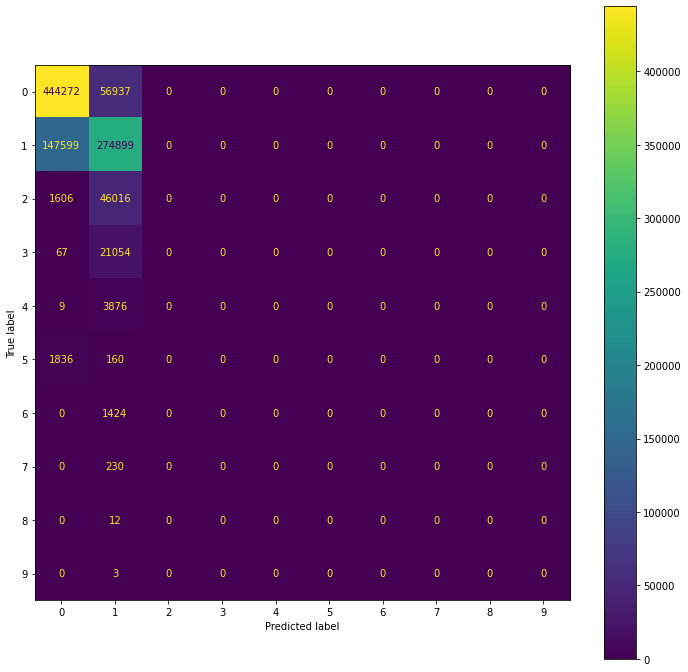

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(12, 12))
# plotting the confusion matrix for the test set
cm = confusion_matrix(y_test,y_pred_classes) 
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes, ax = ax)

## Question:
Compare the advantages and disadvantages of the two models you have implemented and give some ideas on how to improve these results/performance further.

From my results, it appears that pre-processing of data signficantly varies the performance of the models drastically. With just the normalized standard input data, the results barely reached 65% accuracy on both the training and the test set. 

However, after sorting the numerical rank of the card (e.g. C1 - C5) ascendingly, both the vanilla RNN models and LSTM provided these results:

Vanilla RNN (Training Acc): 0.9739 

Vanilla RNN (Training Loss): 0.0095

Vanilla RNN (Testing Acc): 86.80%

LSTM (Training Acc): 0.7032

LSTM (Training Loss): 0.0436 

LSTM (Testing Acc): 70.26%

Unfortunately, some specific details of the dataset are lost as the data is just sorted by the numerical rank instead of sorting both the numerical rank AND the ordinal suit of the cards. This could be another avenue of improvement. 

We can also see that the results/performance could be further improved with a greater variety of the dataset. This can be seen via the confusion matrix. Looking at the dataset, the ordinal class poker hand (0-9) has very low data representation for stronger/rare poker hands. For e.g. the training set only had 5 rows of data of class 9 (Royal Flush). This predictably leads to poor predictions as there are more representations for lower rank hands. Looking at the confusion matrix, both models predicted a majority for labels of only 0 and 1. The dataset, therefore is highly imbalanced and performance could be improved by a more balanced dataset.  

In my specific case, my vanilla RNN model significantly outperformed the LSTM model. However, my vanilla RNN has a significantly higher training accuracy than its testing accuracy which could suggest that the model has overfitted the training data. Reducing the overfitting in the vanilla RNN model could be done by implementing regularization/dropout OR cross-fold validations to reduce overfitting. Cross-fold validations would be particularly difficult for this dataset because of the highly imbalanced dataset. 

Originally, my LSTM model utilized one hidden LSTM layer with 64 neuron units which produced the results above. Increasing the number of neurons from 64 to 256 for the LSTM layer produced marginally better results with training accuracy jumping to 72.2% from 70.26%. The Vanilla RNN model with a 256 neuron units took 1 minute to train while the LSTM model with 256 neuron units took 2 minutes to train. This meant that the time it took the LSTM model to train was twice that of the Vanilla RNN model. 

Another avenue of improvement could perhaps be adding more layers to the LSTM model to help further improve accuracy. 
